In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

C:\Users\ricky\AppData\Local\Temp\ipykernel_21304\2359593263.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


- Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
bestselling_book = pd.read_csv("bestsellers with categories.csv")

- Виведіть перші п'ять рядків (використовується функція head)

In [3]:
bestselling_book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
bestselling_book.shape

(550, 7)

Про скільки книг зберігає дані датасет? Відповідь : 550

In [5]:
bestselling_book.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


Первинне дослідження даних

- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [6]:
bestselling_book.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? Відповідь: Ні

- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [7]:
bestselling_book['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь : 'Non Fiction' and 'Fiction'

- Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

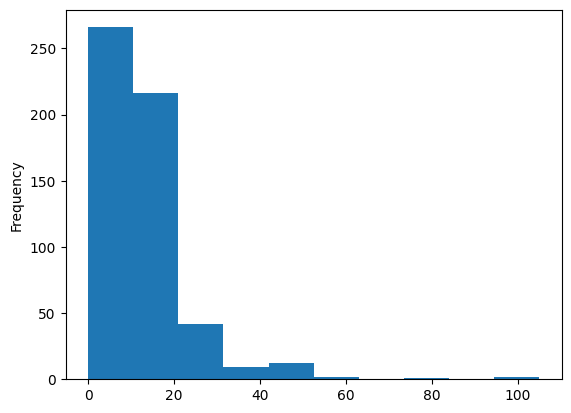

In [8]:
bestselling_book['price'].plot.hist()
plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [9]:
bestselling_book['price'].agg(['max', 'min', 'mean', 'median'])

max       105.0
min         0.0
mean       13.1
median     11.0
Name: price, dtype: float64

Максимальна ціна? 
Відповідь:  105.0

Мінімальна ціна? 
Відповідь: 0.0

Середня ціна? 
Відповідь: 13.1

Медіанна ціна? 
Відповідь: 11.0

Пошук та сортування даних

Який рейтинг у датасеті найвищий? 
Відповідь: 4.9

In [10]:
bestselling_book['user_rating'].agg(['max'])

max    4.9
Name: user_rating, dtype: float64

Скільки книг мають такий рейтинг? 
Відповідь: 52

In [11]:
bestselling_book.query('user_rating == 4.9')['user_rating'].count()

52

Яка книга має найбільше відгуків? 
Відповідь: Where the Crawdads Sin

In [12]:
max_reviews = bestselling_book['reviews'].agg(['max'])
bestselling_book.query('reviews == @max_reviews.values[0]')

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
Відповідь: Publication Manual of the American Psychologic...

In [13]:
best_books = bestselling_book.query('year == 2015')
max_price = best_books['price'].agg(['max'])
best_books.query('price == @max_price.values[0]')

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
Відповідь: 20

In [14]:
bestselling_book.query("year == 2010 & genre == 'Fiction'")['genre'].count()

20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
Відповідь: 1

In [15]:
bestselling_book.query('user_rating == 4.9 & (year == 2010 | year == 2011)')['name'].count()

1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [16]:
sorted_books = bestselling_book.query('year == 2015 & price < 8').sort_values('price')

Яка книга остання у відсортованому списку? 
Відповідь: Old School (Diary of a Wimpy Kid #10)

In [17]:
sorted_books.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [18]:
bestselling_book.groupby(['genre']).agg({'price': ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Максимальна ціна для жанру Fiction: 
Відповідь : 82

Мінімальна ціна для жанру Fiction: 
Відповідь: 0

Максимальна ціна для жанру Non Fiction: 
Відповідь: 105

Мінімальна ціна для жанру Non Fiction: 
Відповідь: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [19]:
counted_book = bestselling_book.groupby(['author'])['name'].agg(['count'])
counted_book

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця? 
Відповідь: 248 rows × 1 columns

Який автор має найбільше книг? 
Відповідь: Jeff Kinney

In [20]:
max_count = counted_book['count'].max()
counted_book.query('count == @max_count')

,count
author,
Jeff Kinney,12


Скільки книг цього автора?
Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [21]:
average_rate = bestselling_book.groupby(['author'])['user_rating'].agg(['mean'])
average_rate

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У якого автора середній рейтинг мінімальний? 
Відповідь: Donna Tartt

In [22]:
min_rate = average_rate['mean'].min()
average_rate.query('mean == @min_rate')

,mean
author,
Donna Tartt,3.9


Який у цього автора середній рейтинг? Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [23]:
df = pd.concat([counted_book, average_rate], axis=1)
df

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [24]:
df = df.sort_values(['count', 'mean'])

Який автор перший у списку?
Відповідь: Muriel Barbery	

In [25]:
df.head(1)

,count,mean
author,,
Muriel Barbery,1,4.0


Візуалізація

додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

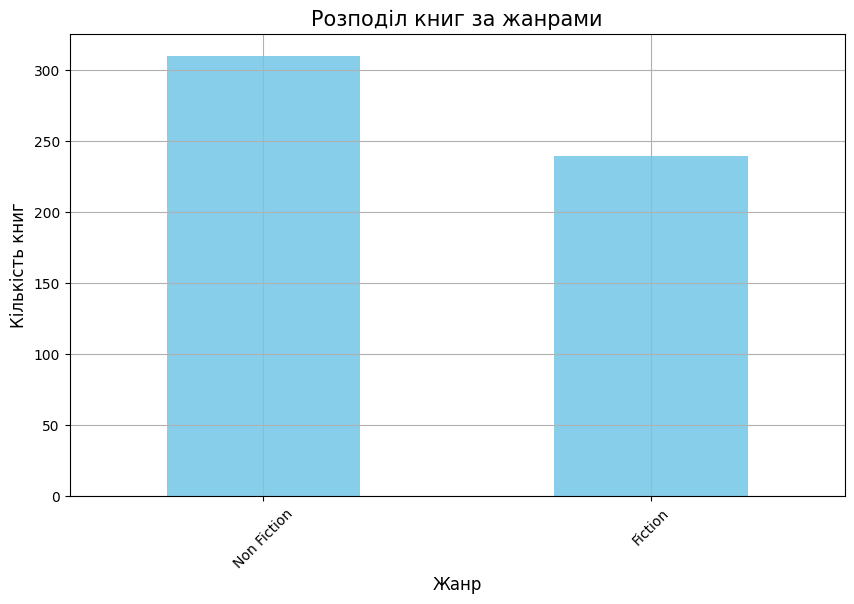

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bestselling_book['genre'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Розподіл книг за жанрами', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Кількість книг', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


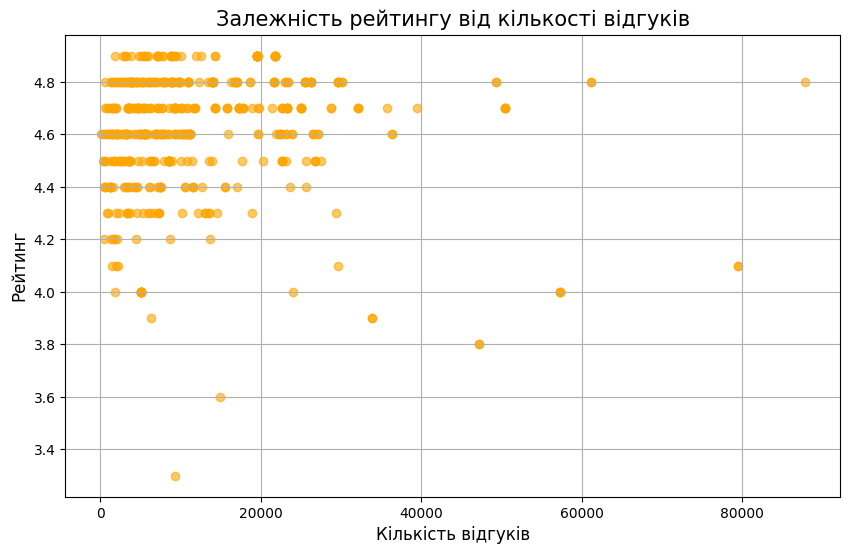

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(bestselling_book['reviews'], bestselling_book['user_rating'], color='orange', alpha=0.6)

plt.title('Залежність рейтингу від кількості відгуків', fontsize=15)
plt.xlabel('Кількість відгуків', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.grid(True)

plt.show()


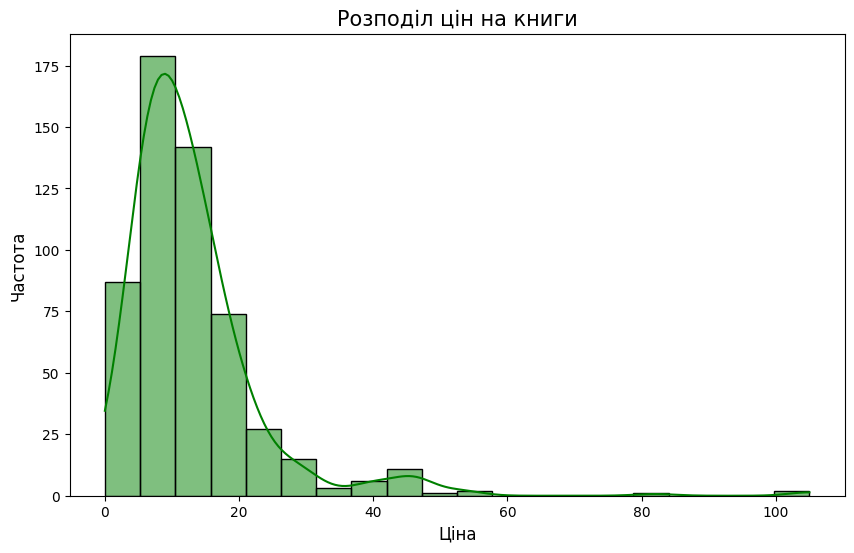

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bestselling_book, x='price', bins=20, kde=True, color='green')

plt.title('Розподіл цін на книги', fontsize=15)
plt.xlabel('Ціна', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.show()
